# Image processing visulizations 

    Sole purpose of this notebook is to demonstrate image processing done in Image_processing_modeling notebook. As well as some image processing that ended up not being used in the final product

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage.filters import prewitt_h,prewitt_v
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

from tqdm import tqdm
import cv2
import os
from PIL import Image
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import pickle

### Dataframe creation
    
    Exact same as done in Image_proccessing_modeling notebook

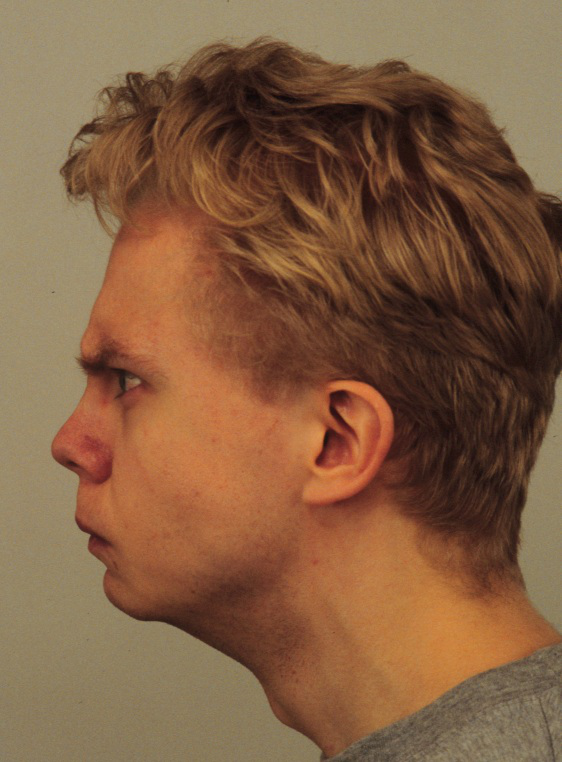

In [52]:
Group = ['A','B']
Gender = ['F','M']
Identity = ['01','02','03','04','05','06','07','08','09','10',
            '11','12','13','14','15','16','17','18','19','20',
            '21','22','23','24','25','26','27','28','29','30',
            '31','32','33','34','35']
Expression = ['AF','AN','DI','HA','NE','SA','SU']
Angle = ['FL','HL','S','HR','FR']


file = "/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/{}{}{}/{}{}{}{}{}.JPG"
stitch_file = file.format(Group[0],Gender[1],Identity[4],Group[0],Gender[1],Identity[4],Expression[1],Angle[0])

#Image.open("../Project3/Data/KDEF/AF01/AF01AFFL.JPG")
Image.open(stitch_file)

In [53]:
compile_list = []

for group in Group:
    for gender in Gender:
        for identity in Identity:
            for expression in Expression:
                for angle in Angle:
                    file = "/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/{}{}{}/{}{}{}{}{}.JPG"
                    stitch_file = file.format(group,gender,identity,
                                              group,gender,identity,
                                              expression,angle)
                    pic_iden = [group,gender,identity,expression,angle,stitch_file]
                    compile_list.append(pic_iden)

In [54]:
headers = ['Group','Gender','Identity','Expression','Head_Angle','Image_Directory']
data_with_headers = []
for i in range(len(compile_list)):
    data_dict = dict(zip(headers, compile_list[i]))
    data_with_headers.append(data_dict)

image_df = pd.DataFrame(data_with_headers)
image_df

,Group,Gender,Identity,Expression,Head_Angle,Image_Directory
0,A,F,01,AF,FL,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF...
1,A,F,01,AF,HL,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF...
2,A,F,01,AF,S,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF...
3,A,F,01,AF,HR,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF...
4,A,F,01,AF,FR,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF...
...,...,...,...,...,...,...
4895,B,M,35,SU,FL,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/BM...
4896,B,M,35,SU,HL,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/BM...
4897,B,M,35,SU,S,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/BM...
4898,B,M,35,SU,HR,/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/BM...


In [56]:
image_df.Image_Directory[1]

'/Users/Cianan/Downloads/KDEF_and_AKDEF/KDEF/AF01/AF01AFHL.JPG'

### Resizing Image


[[131 131 131 ... 134 131 133]
 [132 132 133 ... 131 130 131]
 [133 134 135 ... 132 131 133]
 ...
 [ 68  72  72 ...  70  67  65]
 [ 77  74  76 ...  66  69  71]
 [ 77  70  74 ...  69  68  73]]


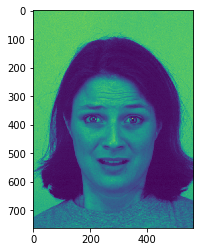

In [57]:
img = cv2.imread(image_df.Image_Directory[2],cv2.IMREAD_GRAYSCALE)
#img1 = cv2.resize(img, (281, 381)) 
print(img)
np_img = np.asarray(img)
#np_img1 = np.asarray(img1)
# Plotting the difference before and after the image is resized
#plt.subplot(1, 2, 1)
plt.imshow(np_img)
# plt.subplot(1, 2, 2)
# plt.imshow(np_img1)

### Cropping Image

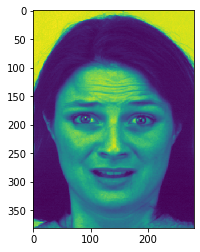

In [58]:
# an important thing to note is, that the crop doesnt actually remove more pixels 
# it keep the same image size of 281x381

img = cv2.imread(image_df.Image_Directory[2], cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (281, 381)) 
crop = iaa.Crop(px=(40))
img = crop.augment_image(img)
plt.imshow(np.array(img))

### Edges of Image

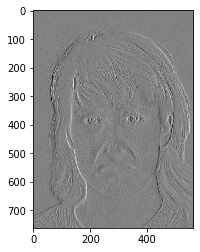

In [59]:
# shows how to do edge detection for images, tried using this as image feature, but got much worse results
image = cv2.imread(image_df.Image_Directory[1077],cv2.IMREAD_GRAYSCALE )
#calculating edges of image
edges_prewitt_horizontal = prewitt_h(image)
edges_prewitt_vertical = prewitt_v(image)

plt.imshow(edges_prewitt_vertical, cmap = 'gray')

### Noise Function

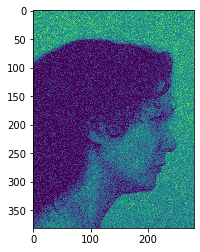

In [60]:
def noise(img):
    img1 = sk.util.random_noise(img)
    return img1

image = cv2.imread(image_df.Image_Directory[44],cv2.IMREAD_GRAYSCALE)
img = cv2.resize(image, (281, 381)) 
img = noise(img)
plt.imshow(img)

### Rotation Function

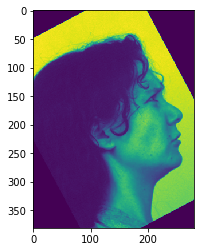

In [61]:
def rotation(img):
    rot_deg = random.uniform(-30, 30)
    img1 = sk.transform.rotate(img, rot_deg)
    return img1

image = cv2.imread(image_df.Image_Directory[44],cv2.IMREAD_GRAYSCALE)
img = cv2.resize(image, (281, 381)) 
img = rotation(img)
plt.imshow(img)

### Flip Function

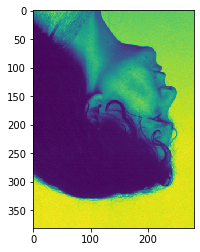

In [62]:
def flip(img):
    flip_hr=iaa.Flipud(p=1.0)
    img1= flip_hr.augment_image(img)
    return img1

image = cv2.imread(image_df.Image_Directory[44],cv2.IMREAD_GRAYSCALE)
img = cv2.resize(image, (281, 381)) 
img = flip(img)
plt.imshow(img)

### Scale Function

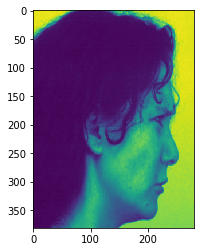

In [26]:
def scale(img):
    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    img1 =scale_im.augment_image(img)
    return img1

image = cv2.imread(image_df.Image_Directory[44],cv2.IMREAD_GRAYSCALE)
img = cv2.resize(image, (281, 381)) 
img = scale(img)
plt.imshow(img)

### Unused 

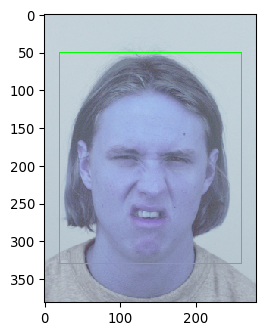

In [310]:
# Creates Boundary box that remains even when changes are made to an image 
image = cv2.imread(image_df1.Image_Directory[1901])
image = cv2.resize(image, (281, 381))
cont = iaa.GammaContrast(gamma=.3)
image =cont.augment_image(image)
bbs = BoundingBoxesOnImage([BoundingBox(x1=20, x2=260, y1=50, y2=330)], shape=image.shape)
ia.imshow(bbs.draw_on_image(image))


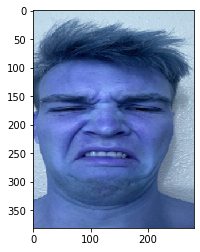

In [40]:
image = cv2.imread("../Project3/Data/Cianan_dis.JPG")
image = cv2.resize(image, (281, 381))
crop = iaa.Crop(px=(30))
img = crop.augment_image(image)
plt.imshow(img)